In [22]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types
from main.data_tools.query_dataframes import cut_dfs_4types


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/Belle_study/ntuple_massvetov2_b2bii_stream10_5_presel/'


In [9]:
Vgamma_ccbar = base_file_loc + 'charm/*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

Vgamma_uds = base_file_loc + 'uds/*.root'
Vgamma_charged = base_file_loc + 'charged/*.root'
Vgamma_mixed = base_file_loc + 'mixed/*.root'


In [47]:
base_filter=' D0_M>1.68 && D0_M<2.05'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.0008 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.0008 && Dstarp_CMS_p>2.5 && gamma_E>0.48 && Belle2Pi0Veto_75MeV>0.023 '
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && Dstarp_isSignal!=1'
# base_filter=' D0_M>1.8 && D0_M<1.9 && Dstarp_isSignal!=1'
# cut value=(0.32, 0.52, 0.0008)
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && Dstarp_isSignal!=1'
# base_filter+='&& gamma_E>0.32 && Pi0_Prob2>0.52'
variables=['__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','Dstarp_chiProb','D0_M','D0_cosHel_0','Phi_M','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','D0_flightDistance','D0_flightDistanceErr']
# variables+=['Pi0_Prob2']
tree='phi'

In [48]:
# pd_Vgamma_ccbar = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter + ' && ',variables=variables)

pd_Vgamma_ccbar = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_uds = get_pd(file=Vgamma_uds, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_charged = get_pd(file=Vgamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_mixed = get_pd(file=Vgamma_mixed, tree=tree,base_filter=base_filter,variables=variables)


In [49]:
# pd_ccbar_signal = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter + '&& Dstarp_isSignal==1',variables=variables)
# cut value=(0.32, 0.52, 0.0008)
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && Dstarp_isSignal==1'
# base_filter+='&& gamma_E>0.32 && Pi0_Prob2>0.52'
# pd_ccbar_signal = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter ,variables=variables)

In [50]:
pd_ccbar = pd_Vgamma_ccbar.reset_index(drop=True)
pd_uds = pd_Vgamma_uds.reset_index(drop=True)
pd_charged = pd_Vgamma_charged.reset_index(drop=True)
pd_mixed = pd_Vgamma_mixed.reset_index(drop=True)


In [51]:
pd_ccbar['rank'] = pd_ccbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_uds['rank'] = pd_uds.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_charged['rank'] = pd_charged.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_mixed['rank'] = pd_mixed.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')


In [52]:
# multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uds[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates())
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uds[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) 

print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

7432
7288
1.0197585071350164


In [53]:
# plt.hist(pd_ccbar.D0_M, bins=np.linspace(1.68,2.05,51));

# plt.hist(pd_ccbar_signal.D0_M, bins=np.linspace(1.68,2.05,51));

# plt.xlim(1.68,2.05)

In [54]:
cut = 'gamma_E>0.48 & Belle2Pi0Veto_75MeV >0.022'
cut = 'gamma_E>0.0'
# cut = 'rank==1'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uds,pd_charged, pd_mixed = cut_dfs_4types(cut, pd_ccbar, pd_uds,pd_charged, pd_mixed)

[201. 204. 190. 173. 194. 142. 165. 186. 157. 189. 199. 192. 183. 187.
 217. 213. 287. 266. 261. 261. 286. 246. 269. 214. 192. 120.  74.  84.
  89.  86.  91.  86.  88.  83.  93. 114.  91.  82.  87.  76.  80.  90.
  83.  71.  90.  86.  98.  59.  75.  82.]
fitst_bin_entries=201.0


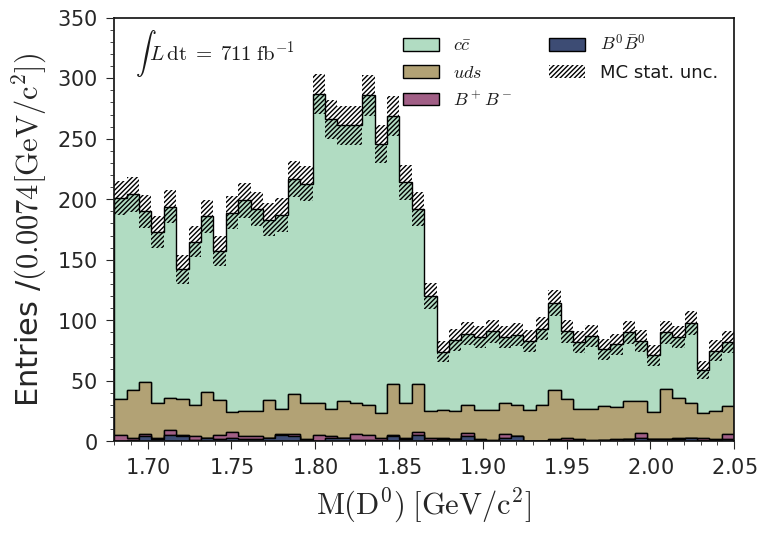

In [63]:
labels = [ r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$uds$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_mixed[var], pd_charged[var],pd_uds[var], pd_ccbar[var]]  


scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]", luminosity="$711\; \mathrm{fb}^{-1}$")
# plt.tight_layout()
# plt.savefig("MC15rd_phi_1ab_optimized_D0.png")

[304. 255. 249. 238. 222. 212. 233. 196. 178. 165. 136. 146. 114. 116.
 125.  97. 109. 107.  88. 106.  69.  69.  78.  68.  86.  66.  65.  62.
  70.  73.  86. 103. 106. 104. 113. 108. 107. 138. 145. 147. 173. 180.
 178. 162. 205. 219. 246. 259. 259. 292.]
fitst_bin_entries=304.0


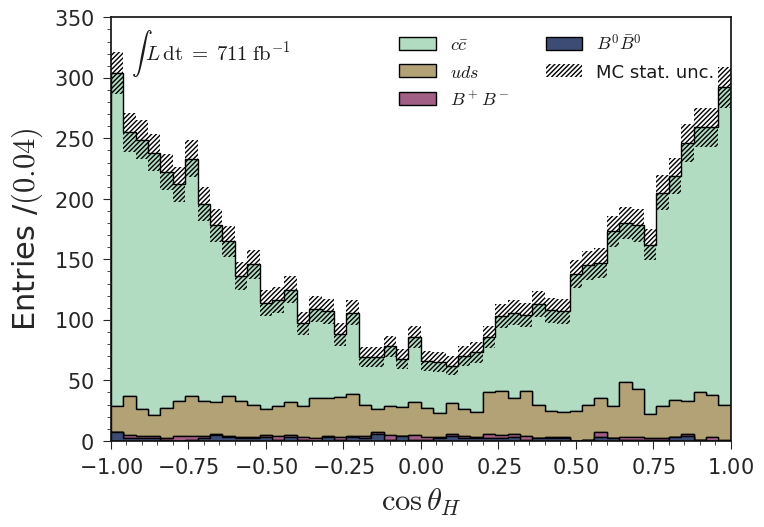

In [64]:
labels = [ r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$uds$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_cosHel_0'
data  = [pd_mixed[var], pd_charged[var],pd_uds[var], pd_ccbar[var]]  


scale = 1
xrange = (-1,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = r"$\cos\theta_H$"
luminosity="$711\; \mathrm{fb}^{-1}$"
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity)
# plt.savefig("MC15rd_phi_1ab_optimized_D0.png")

[5892. 1264.  170.   82.   22.]
fitst_bin_entries=5892.0


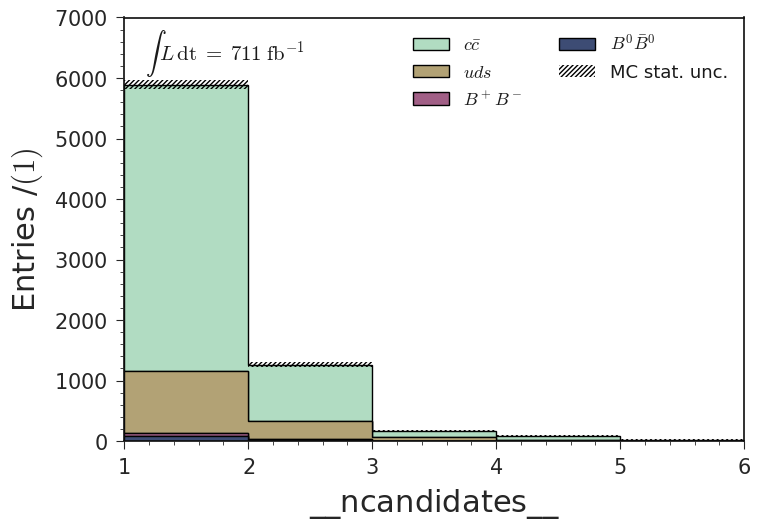

In [65]:
labels = [ r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$uds$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = '__ncandidates__'
data  = [pd_mixed[var], pd_charged[var],pd_uds[var], pd_ccbar[var]]  


scale = 1
xrange = (1,6)
force_range = (1,6)
# xrange = (1.8,1.9)

nbins = 5
xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range,luminosity=luminosity)
# plt.savefig("MC15rd_phi_1ab_optimized_ncandidates.png")